In [1]:
import pandas as pd 


from bs4 import BeautifulSoup

import regex as re 
import string
import nltk
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [2]:
!pip install wordcloud

In [3]:
df= pd.read_csv('../DATASET/Google_data(updated)')

#  Understanding Data

In [4]:
df.head()

,title,Published_on,News_agency,URL,summary,Country,language,tag
0,Rider Strong and Will Friedle Detail Alleged M...,"Mon, 19 Feb 2024 16:57:00 GMT",Variety,https://news.google.com/rss/articles/CBMiamh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
1,'Boy Meets World' Cast Addresses Brian Peck's ...,"Mon, 19 Feb 2024 19:35:33 GMT",Us Weekly,https://news.google.com/rss/articles/CBMicmh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
2,'Boy Meets World' stars discuss former friends...,"Mon, 19 Feb 2024 23:46:37 GMT",Entertainment Weekly News,https://news.google.com/rss/articles/CBMiaGh0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
3,Charted: Share of World Forests by Country - V...,"Sat, 17 Feb 2024 21:01:03 GMT",Visual Capitalist,https://news.google.com/rss/articles/CBMiS2h0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World
4,FBI and allies seize dark-web site of world’s ...,"Tue, 20 Feb 2024 00:10:00 GMT",CNN,https://news.google.com/rss/articles/CBMiV2h0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,World


In [5]:
df.sample(5)

,title,Published_on,News_agency,URL,summary,Country,language,tag
668,"Chargers, Corey Linsley agree to restructured ...","Mon, 19 Feb 2024 16:07:22 GMT",NBC Sports,https://news.google.com/rss/articles/CBMic2h0d...,"<a href=""https://news.google.com/rss/articles/...",US,en,Sports
14136,I'm a Financial Advisor: Invest In These 3 Ass...,"Sun, 18 Feb 2024 21:02:06 GMT",Yahoo Finance,https://news.google.com/rss/articles/CBMiSmh0d...,"<a href=""https://news.google.com/rss/articles/...",BR,en,Finance
6154,Michael J. Fox gets standing ovation presentin...,"Mon, 19 Feb 2024 11:07:00 GMT",Business Insider,https://news.google.com/rss/articles/CBMiTGh0d...,"<a href=""https://news.google.com/rss/articles/...",FR,en,Business
12823,Governor Ivey emphasizes education savings acc...,"Mon, 19 Feb 2024 18:41:26 GMT",Yellowhammer News,https://news.google.com/rss/articles/CBMigAFod...,"<a href=""https://news.google.com/rss/articles/...",RU,en,Education
1532,Business leaders embrace new technologies to b...,"Mon, 19 Feb 2024 14:13:00 GMT",Yahoo Finance,https://news.google.com/rss/articles/CBMiWWh0d...,"<a href=""https://news.google.com/rss/articles/...",GB,en,Technology


In [6]:
df.shape

(15347, 8)

In [7]:
df['summary'][0]

'<a href="https://news.google.com/rss/articles/CBMiamh0dHBzOi8vdmFyaWV0eS5jb20vMjAyNC90di9uZXdzL3JpZGVyLXN0cm9uZy13aWxsLWZyaWVkbGUtYnJpYW4tcGVjay1ncm9vbWluZy1ib3ktbWVldHMtd29ybGQtMTIzNTkxNDU0NS_SAW5odHRwczovL3ZhcmlldHkuY29tLzIwMjQvdHYvbmV3cy9yaWRlci1zdHJvbmctd2lsbC1mcmllZGxlLWJyaWFuLXBlY2stZ3Jvb21pbmctYm95LW1lZXRzLXdvcmxkLTEyMzU5MTQ1NDUvYW1wLw?oc=5" target="_blank">Rider Strong and Will Friedle Detail Alleged Manipulation and Grooming by ‘Boy Meets World’ Guest Star Brian Peck</a>&nbsp;&nbsp;<font color="#6f6f6f">Variety</font>'

In [8]:
df.columns

Index(['title', 'Published_on', 'News_agency', 'URL', 'summary', 'Country',
       'language', 'tag'],
      dtype='object')

In [9]:
df['tag'].value_counts()

World            1325
Entertainment    1307
Education        1289
Business         1287
Environment      1284
Sports           1280
Finance          1278
Science          1270
Technology       1269
Health           1265
Nation           1256
Politics         1237
Name: tag, dtype: int64

In [10]:
df['Country'].value_counts()

IN    1202
CA    1193
GB    1190
US    1179
DE    1179
FR    1179
ES    1179
IT    1179
JP    1179
CN    1179
RU    1179
BR    1179
AU    1151
Name: Country, dtype: int64

In [11]:
df['News_agency'].value_counts()

Yahoo Finance         575
CNN                   504
Business Insider      472
CBS Sports            337
The Guardian          319
                     ... 
WKU News                1
WSB Atlanta             1
GuelphToday             1
CTV News Vancouver      1
DD News                 1
Name: News_agency, Length: 1318, dtype: int64

In [12]:
df['language'].value_counts()

en    15347
Name: language, dtype: int64

# Extracting only date from published_on

In [13]:
df['Published_on'] = pd.to_datetime(df['Published_on'], format="%a, %d %b %Y %H:%M:%S %Z")
df['year'] = df['Published_on'].dt.year

In [14]:
df['year'].value_counts()

2024    15146
2023      196
2020        2
2018        2
2019        1
Name: year, dtype: int64

# Checking for Null Values

In [15]:
df.isna().mean() #checking percentage of null values 

title           0.0
Published_on    0.0
News_agency     0.0
URL             0.0
summary         0.0
Country         0.0
language        0.0
tag             0.0
year            0.0
dtype: float64

# Checking for class imbalance

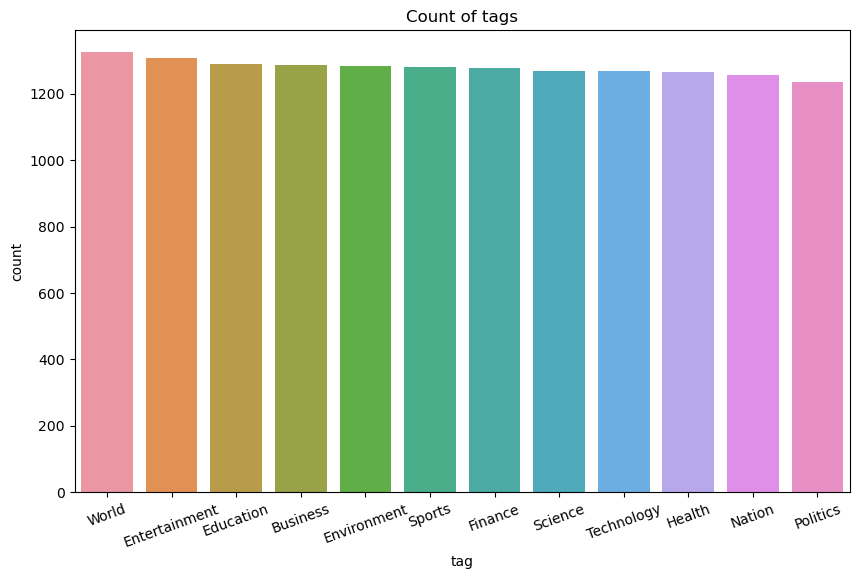

In [16]:
#using a countplot to see the distribution of tags
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='tag',order=df['tag'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of tags')
plt.show()

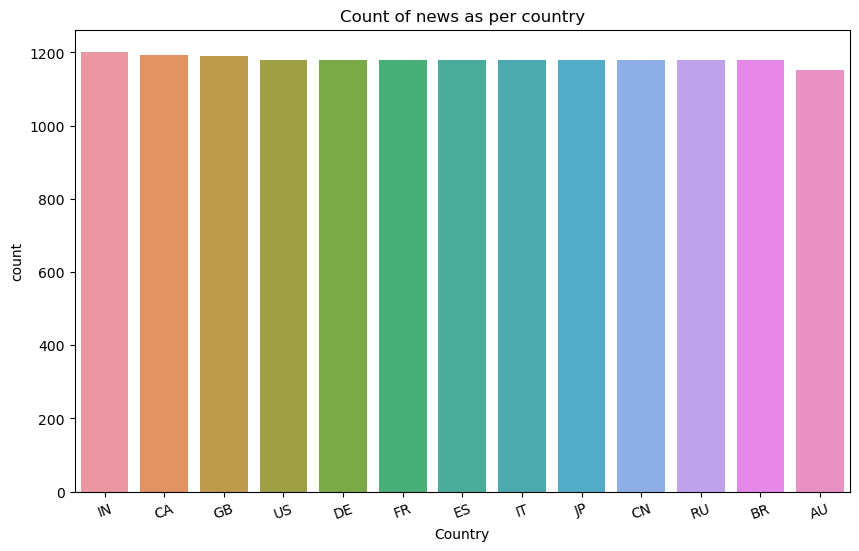

In [17]:
#using a countplot to get count of news as per country
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Country',order=df['Country'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of news as per country')
plt.show()

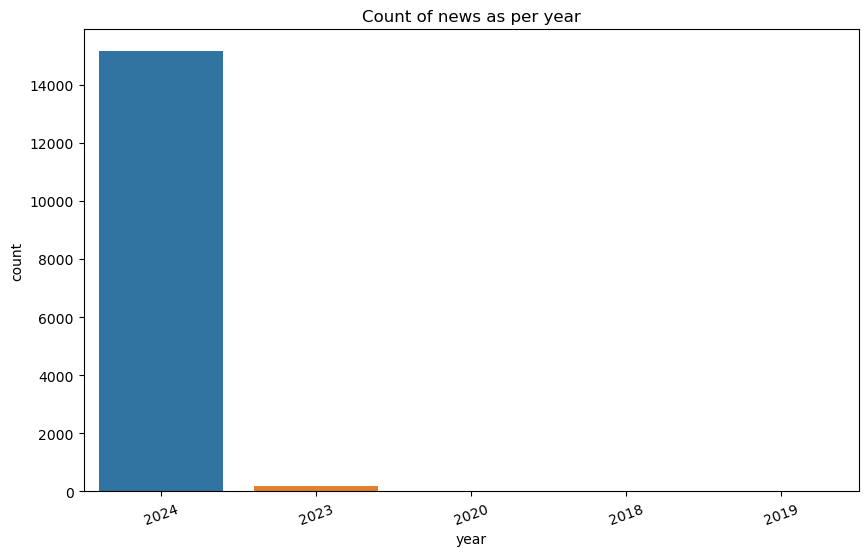

In [18]:
#using a countplot to get count of news as per year
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='year',order=df['year'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of news as per year')
plt.show()

<Axes: ylabel='tag'>

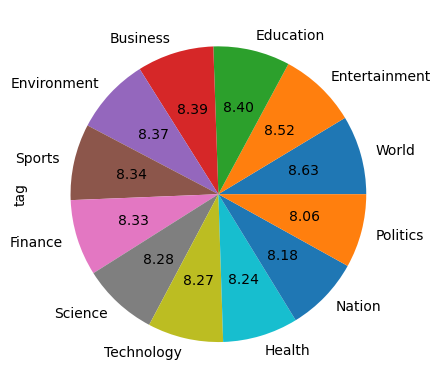

In [19]:
df['tag'].value_counts().plot(kind='pie',autopct='%.2f')

# Remove HTML content

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return re.sub(r'(\xa0)', '', soup.get_text())

df['summary'] = df['summary'].apply(strip_html)
df['summary'][1]

"'Boy Meets World' Cast Addresses Brian Peck's Sexual Abuse ConvictionUs Weekly"

# Merging Summary and Title

In [21]:
df['Merged'] = df['title'] + ' - ' + df['summary']

In [22]:
df['Merged'][1500]

"Sheffield Forgemasters announces 'global leap' in nuclear welding technology - Bdaily News - Sheffield Forgemasters announces 'global leap' in nuclear welding technologyBdaily News"

# Convert to lowercase

In [23]:
df['Merged'] = df['Merged'].apply(lambda x: x.lower())
df['Merged'][1]

"'boy meets world' cast addresses brian peck's sexual abuse conviction - us weekly - 'boy meets world' cast addresses brian peck's sexual abuse convictionus weekly"

# Remove Punctuation


In [24]:
def punctuation_removal(text):
    sp = string.punctuation
    sp.join('“”’')
    for p in sp:
        text = text.replace(p, "")
    return text

df['Merged'] = df['Merged'].apply(punctuation_removal)
df['Merged'][0]

'rider strong and will friedle detail alleged manipulation and grooming by ‘boy meets world’ guest star brian peck  variety  rider strong and will friedle detail alleged manipulation and grooming by ‘boy meets world’ guest star brian peckvariety'

# Tokenisation 

In [25]:
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens


df['Merged'] = df['Merged'].apply(tokenization)


In [26]:
df[['Merged']]

,Merged
0,"[rider, strong, and, will, friedle, detail, al..."
1,"[boy, meets, world, cast, addresses, brian, pe..."
2,"[boy, meets, world, stars, discuss, former, fr..."
3,"[charted, share, of, world, forests, by, count..."
4,"[fbi, and, allies, seize, darkweb, site, of, w..."
...,...
15342,"[capital, small, finance, bank, ipo, allotment..."
15343,"[capital, one, to, buy, discover, financial, i..."
15344,"[municipal, finance, shapes, urban, climate, a..."
15345,"[earnings, season, ends, today, mm, muthoot, f..."


# Remove Stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
i=0
def remove_stopwords(text):
    output = []
    for w in text:
        if w not in stopwords and len(w)>4:
            output.append(w)
    return output

df['Merged'] = df['Merged'].apply(remove_stopwords)


In [ ]:
df[['Merged']]

# Lemmatize the words

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

df['Merged'] = df['Merged'].apply(lemmatizer)


In [ ]:
df[['Merged']][:5]

# WordCloud

In [ ]:
from wordcloud import WordCloud


In [ ]:
# Generate a word cloud image
text= df['Merged'].to_string()

plt.figure(figsize = (20,20))

wordcloud = WordCloud(max_words = 100 , width = 1000 , height = 1000 , background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tfidf Word Cloud

In [ ]:
vectorizer_tfidf = TfidfVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(df['Merged'])

feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

tfidf_text = ' '.join(feature_names_tfidf)

wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate(tfidf_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - TF-IDF')
plt.show()

In [ ]:
feature_names_tfidf[:100]

# CountVectoriser WordCloud

In [ ]:
vectorizer_bow = CountVectorizer()

X_bow = vectorizer_bow.fit_transform(df['Merged'])

feature_names_bow = vectorizer_bow.get_feature_names_out()

bow_text = ' '.join(feature_names_bow)

wordcloud_bow = WordCloud(width=800, height=400, background_color='white').generate(bow_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Bag of Words (BoW)')
plt.show()

In [ ]:
feature_names_bow[:100]

In [ ]:
# showing the frequency distribution of words
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Merged'].apply(lambda x: len(x.split())), bins=20, kde=True, color='forestgreen')
plt.title('Distribution of Number of Words in cleaned data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Save Preprocessed data 

In [ ]:
df.to_csv("../DATASET/PreprocessedData.csv", index=False)